# Regresión Polinomial

Cuando la tendencia de los datos no es realmente lineal y toman sentido curvilíneal, podemos utilizar métodos de regresión polinomial. Los cuales generán regresionales que se ajustan a la curva de los datos. 

Existen muchos regresión que se pueden formar a partir del aúmento del grado del polinomio.

Donde la relación entre la variable independiente x y la variable dependiente y se modela como un polinomio de enésimo grado en x. 

Por ejemplo si aumentamos a grado dos, tendriamos una curva con la siguiente ecuación:

$$y = b + \theta_1  x + \theta_2 x^2$$




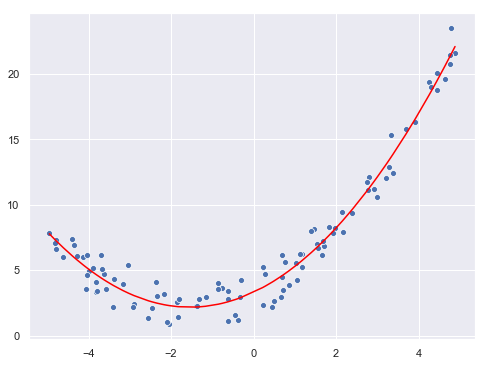

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [3]:
df = pd.read_csv("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/FuelConsumptionCo2.csv") #Características de autos y emisión de CO2

In [4]:
df[["ENGINESIZE", "CO2EMISSIONS"]]

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


In [5]:
X = np.asanyarray(df[['ENGINESIZE']])
y = np.asanyarray(df[['CO2EMISSIONS']])
X

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [6]:
#Utilizamos la función train_test_split de sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

La función **PolynomialFeatures()** de sklearn genera una matriz que consta de todas las combinaciones de polinomios de las características con grado menor o igual al grado especificado. El conjunto de características original tiene solo una característica, **ENGINESIZE**. Si seleccionamos el grado del polinomio para que sea 2, entonces genera 3 características, grado = 0, grado = 1 y grado = 2:

In [7]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.  ,  2.7 ,  7.29],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  4.7 , 22.09],
       ...,
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  5.2 , 27.04],
       [ 1.  ,  3.6 , 12.96]])

**fit_transform**

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$


$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

Ahora toma forma de una regresión lineal gracias a la transformación realizada previamente

In [8]:
regresion_poly = linear_model.LinearRegression()
regresion_poly.fit(X_train_poly, y_train)

LinearRegression()

In [9]:
# Encontramos los coeficientes 
print ('w_1: ', regresion_poly.coef_)
print ('w_0: ',regresion_poly.intercept_)

w_1:  [[ 0.         52.54390645 -1.77658931]]
w_0:  [104.36671165]


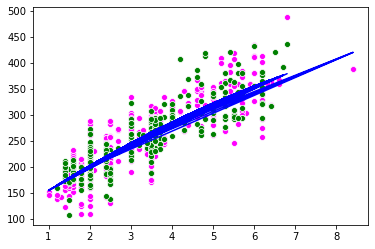

In [10]:
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green") #prueba 
plt.plot(X_train, regresion_poly.coef_[0][1]*X_train + (regresion_poly.coef_[0][2]*X_train**2)+ regresion_poly.intercept_[0], '-b')
plt.show()

In [11]:
X_test_poly = poly.fit_transform(X_test)
X_test_poly
yhat = regresion_poly.predict(X_test_poly)

for i,j in zip(yhat,y_test):
    print("Predicción: ",i, "Valor real: ",j)

Predicción:  [339.61637062] Valor real:  [292]
Predicción:  [202.34816732] Valor real:  [192]
Predicción:  [183.88889334] Valor real:  [175]
Predicción:  [246.00912724] Valor real:  [262]
Predicción:  [224.6227946] Valor real:  [168]
Predicción:  [332.94502223] Valor real:  [317]
Predicción:  [332.94502223] Valor real:  [277]
Predicción:  [183.88889334] Valor real:  [207]
Predicción:  [246.00912724] Valor real:  [227]
Predicción:  [224.6227946] Valor real:  [170]
Predicción:  [274.45765791] Valor real:  [269]
Predicción:  [278.37960657] Valor real:  [322]
Predicción:  [202.34816732] Valor real:  [209]
Predicción:  [224.6227946] Valor real:  [198]
Predicción:  [266.50716522] Valor real:  [256]
Predicción:  [346.14559186] Valor real:  [294]
Predicción:  [202.34816732] Valor real:  [225]
Predicción:  [179.18524538] Valor real:  [196]
Predicción:  [220.23893272] Valor real:  [244]
Predicción:  [361.84683872] Valor real:  [322]
Predicción:  [308.4760516] Valor real:  [283]
Predicción:  [202

Predicción:  [202.34816732] Valor real:  [189]
Predicción:  [315.64484499] Valor real:  [419]
Predicción:  [246.00912724] Valor real:  [258]
Predicción:  [183.88889334] Valor real:  [184]
Predicción:  [220.23893272] Valor real:  [216]
Predicción:  [183.88889334] Valor real:  [202]
Predicción:  [266.50716522] Valor real:  [255]
Predicción:  [286.11690855] Valor real:  [297]
Predicción:  [301.16513106] Valor real:  [317]
Predicción:  [274.45765791] Valor real:  [283]
Predicción:  [322.67151124] Valor real:  [264]
Predicción:  [202.34816732] Valor real:  [165]
Predicción:  [246.00912724] Valor real:  [285]
Predicción:  [322.67151124] Valor real:  [310]
Predicción:  [220.23893272] Valor real:  [225]
Predicción:  [202.34816732] Valor real:  [228]
Predicción:  [202.34816732] Valor real:  [197]
Predicción:  [266.50716522] Valor real:  [221]
Predicción:  [183.88889334] Valor real:  [214]
Predicción:  [312.07821419] Valor real:  [327]
Predicción:  [266.50716522] Valor real:  [229]
Predicción:  

In [12]:
mean_squared_error(yhat,y_test)

913.4580110399173

In [13]:
r2_score(y_test,yhat)

0.7614558494206456

# Regresiones No-lineales

En el caso de las regresiones no lineales, nosotros elegimos la ecuación de la curva que se va ajustar a los puntos, puede ser una curva polinomial, exponencial, logaritmica, senoidal,  

#### Ecuación cúbica

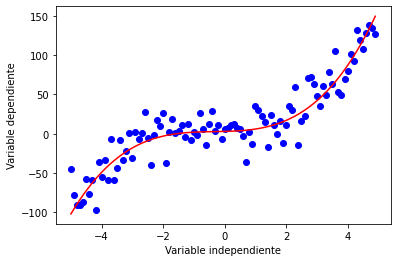

In [14]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_ruido = 20 * np.random.normal(size=x.size)
ydata = y + y_ruido
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

#### Ecución cuadratica

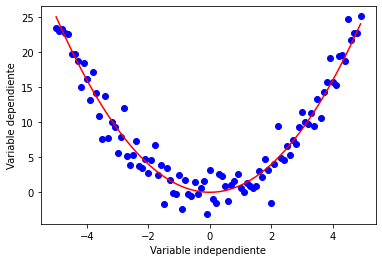

In [15]:
x = np.arange(-5.0, 5.0, 0.1)

y = (x**2)
y_ruido = 2 * np.random.normal(size=x.size)
ydata = y + y_ruido
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

#### Ecuación exponencial

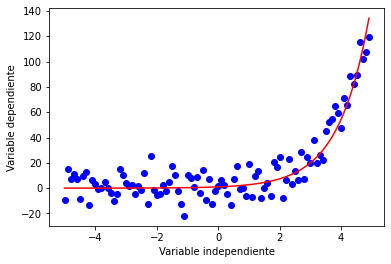

In [16]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.exp(x)
y_ruido = 10 * np.random.normal(size=x.size)
ydata = y + y_ruido
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

#### Ecuación lógaritmica

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


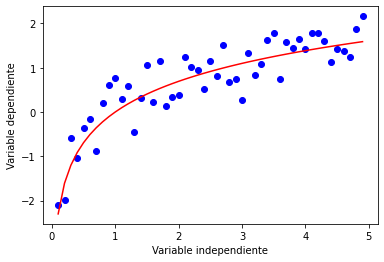

In [17]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.log(x)
y_ruido = 0.4 * np.random.normal(size=x.size)
ydata = y + y_ruido
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

### Ejemplo

In [139]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


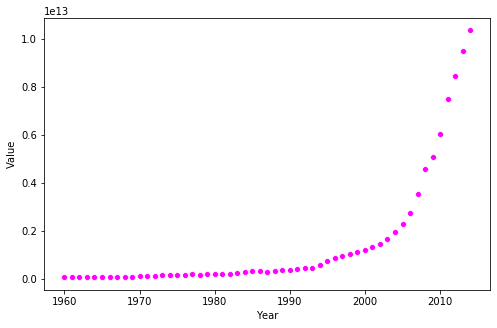

In [140]:
plt.figure(figsize=(8,5))
sns.scatterplot(df["Year"], df["Value"], color="magenta")
plt.show()

In [141]:
X = df["Year"].values
y = df["Value"].values

In [142]:
X

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [143]:
df["Year"].describe()

count      55.00000
mean     1987.00000
std        16.02082
min      1960.00000
25%      1973.50000
50%      1987.00000
75%      2000.50000
max      2014.00000
Name: Year, dtype: float64

In [144]:
# Normalizamos los datos
X_norm =X/max(X)
Y_norm =y/max(y)

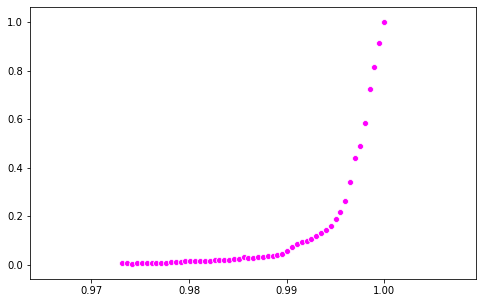

In [151]:
plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="magenta")
plt.show()

### Función Sigmoidal

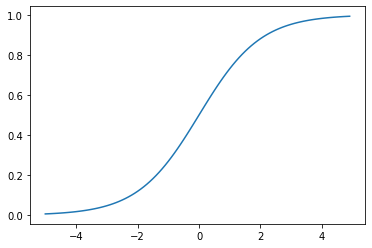

In [146]:
X2 = np.arange(-5.0, 5.0, 0.1)
Y2 = 1.0 / (1.0 + np.exp(-X2))
plt.plot(X2,Y2) 
plt.show()

La ecuación de la función sigmoidal es la siguiente:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controla el paso  la curva

$\beta_2$: Mueve la curva en el eje X.

In [147]:
# Creamos la función

def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

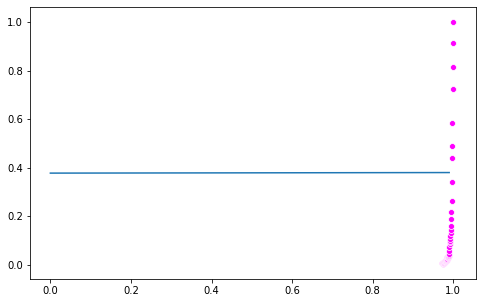

In [163]:
plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="magenta")
X2 =  np.arange(0, 1, 0.01)
beta_1 = 0.010
beta_2 = 50.0

Y_pred = sigmoid(X2, beta_1 , beta_2)
plt.plot(X2, Y_pred)
plt.show()

Tenemos que ajustar la curva, respecto a los puntos, por lo tanto vamos a utilizar la función **curve_fit**

In [164]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, X_norm, Y_norm)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = 690.453018, beta_2 = 0.997207


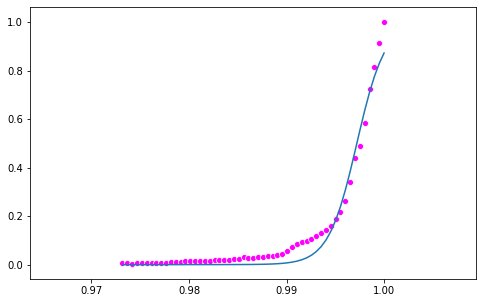

In [165]:
plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="magenta")

beta_1 = 690.453018
beta_2 = 0.997207

Y_pred = sigmoid(X_norm, beta_1,beta_2)
plt.plot(X_norm, Y_pred)
plt.show()